In [143]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix 
from sklearn.metrics import roc_curve 
data = pd.read_csv('https://code.s3.yandex.net/datasets/travel_insurance_preprocessed.csv')
import matplotlib.pyplot as plt
import seaborn as sns
target = data['Claim']
features = data.drop('Claim', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]


In [157]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
print(len(thresholds))
print(len(fpr))
print(len(tpr))

6
6
6


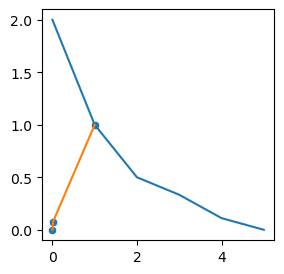

In [156]:
plt.figure(figsize=(3,3));
sns.scatterplot(x=fpr,y=tpr)
sns.lineplot(thresholds)
plt.plot(fpr, tpr, )
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
plt.show()

In [ ]:
print(f1_score(target_valid, predicted_valid))
print(recall_score(target_valid, predicted_valid))
print(precision_score(target_valid, predicted_valid))
print()
print(confusion_matrix(target_valid, predicted_valid))

In [ ]:
target_valid.value_counts()

In [ ]:
re = 0.09
pr = 0.09

tpr = 12/169
fpr = 166/(12330+166)
fpr


In [130]:
s = ((2*re*pr)/
     (pr+re))
s

0.09